In [2]:
%load_ext autoreload
%autoreload 2

from Dataset import *
import glob 
import os 
import plotly.express as px
import tensorflow as tf

In [2]:
nb_samples = 50
create_img_dataset('../DATA',nb_samples)

(array([[2.14027714e+01, 4.46265041e+01, 5.68231541e+01, ...,
         2.40259051e+00, 1.54148778e+00, 4.38054217e+00],
        [7.85726935e-02, 5.92325541e-01, 3.75171544e+00, ...,
         9.88461210e-01, 6.12131317e+00, 6.19935125e+00],
        [2.32203200e-02, 2.56412896e-01, 1.12046363e+00, ...,
         1.30077206e+00, 1.65793364e+00, 1.84003941e+00],
        ...,
        [9.95489786e+00, 4.62777114e+01, 8.47903708e+01, ...,
         4.84911894e-01, 1.82090088e+00, 3.07363351e+00],
        [6.27928313e+00, 6.48764794e+01, 1.54435779e+02, ...,
         2.09984791e+00, 6.88861683e+00, 1.17583245e+01],
        [1.67503509e+00, 1.72376240e-01, 1.61741488e+00, ...,
         3.62250555e-02, 2.51721926e-01, 7.40621699e-01]]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
        2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
        4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
        6, 7, 8, 9]))

In [3]:
df = pd.read_csv('../Image_dataset/imgs_dataset(40,50).csv')
y = df['labels'].astype(int)
X = df.to_numpy().T[2:].T
X.shape
nb_samples = 50

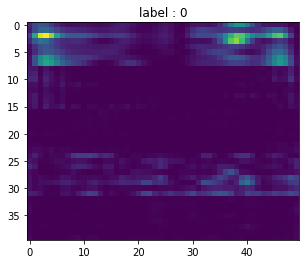

In [4]:
N=0
plt.imshow(X[N].reshape(40,nb_samples))
plt.title('label : '+str(y[N]))
plt.show()

In [24]:
n_train = 60

x_train,y_train = X[:n_train],y[:n_train]
x_train = np.reshape(x_train, (x_train.shape[0], 40, nb_samples, 1))

x_test,y_test = X[n_train:],y[n_train:]
x_test = np.reshape(x_test, (x_test.shape[0], 40,nb_samples, 1))
print(x_train.shape)
print(x_test.shape)


(60, 40, 50, 1)
(10, 40, 50, 1)


In [42]:

inputs = tf.keras.Input(shape=(x_train.shape[1], x_train.shape[2],1))

# Convolutional Layer #1
conv1 = tf.keras.layers.Conv2D(
      filters=32,
      kernel_size=[40, 3],
      padding="same",
      activation=tf.nn.relu)(inputs)
# Pooling Layer #1
pool1 = tf.keras.layers.MaxPooling2D(pool_size=[2, 2], strides=2)(conv1)

dflat1 = pool1.shape[1] * pool1.shape[2] * pool1.shape[3]
pool3_flat = tf.reshape(pool1, [-1, dflat1])

mlp1 = tf.keras.layers.Dense(units=20, activation=tf.nn.relu)(pool3_flat)

logits = tf.keras.layers.Dense(units=10)(mlp1)
smax = tf.keras.layers.Softmax()(logits)
model1 = tf.keras.Model(inputs=inputs, outputs=smax)

model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy(),])

model1.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 40, 50, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 40, 50, 32)        3872      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 20, 25, 32)       0         
 2D)                                                             
                                                                 
 tf.reshape_8 (TFOpLambda)   (None, 16000)             0         
                                                                 
 dense_16 (Dense)            (None, 20)                320020    
                                                                 
 dense_17 (Dense)            (None, 10)                210       
                                                           

In [43]:
model1.fit(x=x_train, y=tf.keras.utils.to_categorical(y_train), batch_size=2, epochs=10) 

Epoch 1/10
30/30 [==============================] - 0s 5ms/step - loss: 271.4053 - categorical_accuracy: 0.0500
Epoch 2/10
30/30 [==============================] - 0s 5ms/step - loss: 2.3786 - categorical_accuracy: 0.0167
Epoch 3/10
30/30 [==============================] - 0s 5ms/step - loss: 2.3559 - categorical_accuracy: 0.0667
Epoch 4/10
30/30 [==============================] - 0s 5ms/step - loss: 2.3762 - categorical_accuracy: 0.0167
Epoch 5/10
30/30 [==============================] - 0s 5ms/step - loss: 2.3450 - categorical_accuracy: 0.0333
Epoch 6/10
30/30 [==============================] - 0s 5ms/step - loss: 2.3765 - categorical_accuracy: 0.0333
Epoch 7/10
30/30 [==============================] - 0s 5ms/step - loss: 2.3488 - categorical_accuracy: 0.0500
Epoch 8/10
30/30 [==============================] - 0s 5ms/step - loss: 2.3720 - categorical_accuracy: 0.0500
Epoch 9/10
30/30 [==============================] - 0s 5ms/step - loss: 2.3563 - categorical_accuracy: 0.0500
Epoch 10

In [37]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model1.evaluate(x=x_test, y=tf.keras.utils.to_categorical(y_test), batch_size=2)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
predictions = model1.predict(x_test)

Evaluate on test data
5/5 [==============================] - 0s 2ms/step - loss: 2.3026 - categorical_accuracy: 0.1000
test loss, test acc: [2.3025925159454346, 0.10000000149011612]
